In [1]:
## Initialization
#pakages
ENV["JULIA_PKG_SERVER"] = "https://jp.pkg.julialang.org"
using Pkg
using CSV
using DataFrames
using DifferentialEquations
using Interpolations
using Plots


#             1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
stoi_mat = [  1  -1  0  -1  1;
              0  1  -1  -1  1;
              0  0  0    1  -1;
              0  0  0    1  -1;
]


function schematic_MassAction(du, u, p, t)
  f = [1, u[1], u[2], u[1]*u[2], u[3]*u[4]]
  r = p .* f
  du_vec = stoi_mat * r
  # du = du_vec
  du[1] = du_vec[1]
  du[2] = du_vec[2]
  du[3] = du_vec[3]
  du[4] = du_vec[4]
end


p1 = [5.0, 4.7, 7.8, 5.7, 3.8]
u0 = [1.064, 0.641, 0.825, 1.239]


tspan1 = (0.0, 10.0)

prob1 = ODEProblem(schematic_MassAction,u0,tspan1,p1)
sol1 = solve(prob1, Vern9())
sol_mat1 = reduce(hcat,sol1.u)'

46×4 adjoint(::Matrix{Float64}) with eltype Float64:
 1.064    0.641     0.825     1.239
 1.06381  0.640959  0.825194  1.23919
 1.06378  0.640954  0.82525   1.23925
 1.06379  0.640976  0.825284  1.23928
 1.0638   0.64099   0.825305  1.23931
 1.06381  0.641002  0.825322  1.23932
 1.06382  0.641011  0.825334  1.23933
 1.06383  0.641021  0.825338  1.23934
 1.06384  0.641028  0.825339  1.23934
 1.06384  0.64103   0.825343  1.23934
 ⋮                            
 1.06384  0.641031  0.825353  1.23935
 1.06384  0.641031  0.825353  1.23935
 1.06384  0.641031  0.825353  1.23935
 1.06384  0.641031  0.825353  1.23935
 1.06384  0.641031  0.825353  1.23935
 1.06384  0.641031  0.825353  1.23935
 1.06384  0.641031  0.825353  1.23935
 1.06384  0.641031  0.825353  1.23935
 1.06383  0.641029  0.825355  1.23935

In [2]:
length1 = size(sol_mat1)[1]

46

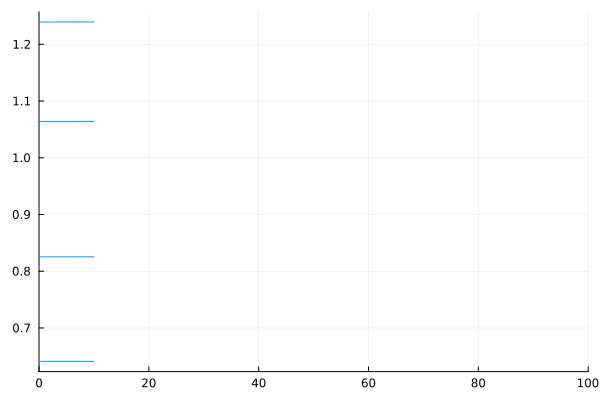

In [3]:
plot(sol1.t[1:length1], sol_mat1[1:length1, 1:4], xlims = (0, 100), label = "", color = 1)

In [4]:
sol_mat1[length1,:]

4-element Vector{Float64}:
 1.0638332728785926
 0.6410286521037185
 0.8253549729512225
 1.239354972951223

In [5]:
flux_mat1 = zeros((size(sol_mat1)[1], 5))
for i in 1:size(sol_mat1)[1]
  u = copy(sol_mat1[i,:])
  f1 = [1, u[1], u[2], u[1]*u[2], u[3]*u[4]]
  r1 = p1 .* f1
  flux_mat1[i,:] = r1
end

10.0

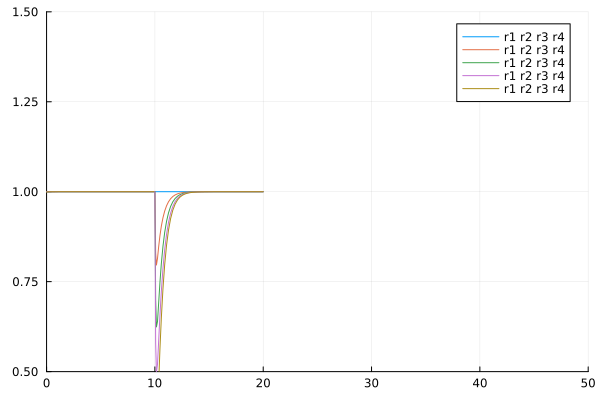

In [6]:
p2 = copy(p1)
u02 = sol_mat1[length1,:]
u02[3] = u02[3]-1
tspan2 = (10.0, 20.0)
print(sol1.t[length1])

prob2 = ODEProblem(schematic_MassAction,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

length2 = size(sol_mat2)[1]
flux_mat2 = zeros((size(sol_mat2)[1], 5))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [1, u[1], u[2], u[1]*u[2], u[3]*u[4]]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]

end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))


for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]

end

plot(sol1.t[1:length1], norm_flux_mat1[1:length1,1:5], xlims = (0, 50), ylim = (0.5, 1.5), label = "", color = [1 2 3 4 5])
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,1:5], label = "r1 r2 r3 r4", color = [1 2 3 4 5])

10.0

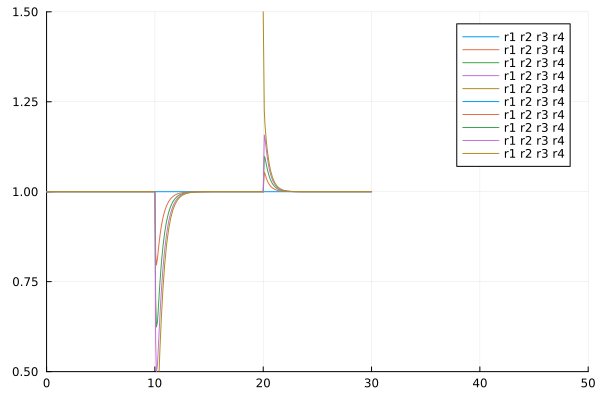

In [7]:
p3 = copy(p2)
u03 = sol_mat2[length2,:]
p3[5] = 1.5 * p3[5]
tspan3 = (20.0, 30.0)
print(sol1.t[length1])

prob3 = ODEProblem(schematic_MassAction,u03,tspan3,p3)
sol3 = solve(prob3, Vern9())
sol_mat3 = reduce(hcat,sol3.u)'

length3 = size(sol_mat3)[1]
flux_mat3 = zeros((size(sol_mat3)[1], 5))
for i in 1:size(sol_mat3)[1]
  u = copy(sol_mat3[i,:])
  f3 = [1, u[1], u[2], u[1]*u[2], u[3]*u[4]]
  r3 = p3 .* f3
  flux_mat3[i,:] = r3
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))
norm_flux_mat3 = zeros(size(flux_mat3))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]
  norm_flux_mat3[:,j] = flux_mat3[:,j] / flux_mat1[end,j]
end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))
norm_sol_mat3 = zeros(size(sol_mat3))

for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]
  norm_sol_mat3[:,j] = sol_mat3[:,j] / sol_mat1[end,j]
end

plot!(sol3.t[1:length3], norm_flux_mat3[1:length3,1:5], label = "r1 r2 r3 r4", color = [1 2 3 4 5])

In [8]:
p4 = copy(p3)
u04 = sol_mat3[length3,:]
p4[1] = 1.2 * p4[1]
tspan4 = (30.0, 50.0)
print(sol1.t[length1])

prob4 = ODEProblem(schematic_MassAction,u04,tspan4,p4)
sol4 = solve(prob4, Vern9())
sol_mat4 = reduce(hcat,sol4.u)'

length4 = size(sol_mat4)[1]
flux_mat4 = zeros((size(sol_mat4)[1], 5))
for i in 1:size(sol_mat4)[1]
  u = copy(sol_mat4[i,:])
  f4 = [1, u[1], u[2], u[1]*u[2], u[3]*u[4]]
  r4 = p4 .* f4
  flux_mat4[i,:] = r4
end

10.0

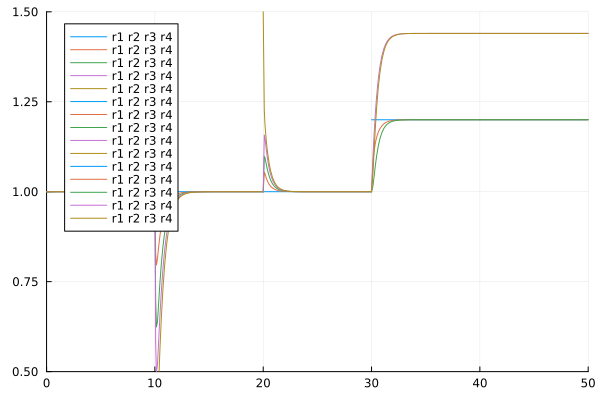

In [9]:


norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))
norm_flux_mat3 = zeros(size(flux_mat3))
norm_flux_mat4 = zeros(size(flux_mat4))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]
  norm_flux_mat3[:,j] = flux_mat3[:,j] / flux_mat1[end,j]
  norm_flux_mat4[:,j] = flux_mat4[:,j] / flux_mat1[end,j]
end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))
norm_sol_mat3 = zeros(size(sol_mat3))
norm_sol_mat4 = zeros(size(sol_mat4))

for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]
  norm_sol_mat3[:,j] = sol_mat3[:,j] / sol_mat1[end,j]
  norm_sol_mat4[:,j] = sol_mat4[:,j] / sol_mat1[end,j]
end

plot!(sol4.t[1:length4], norm_flux_mat4[1:length4,1:5], label = "r1 r2 r3 r4", color = [1 2 3 4 5])